In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [3]:
dataset = pd.read_csv('breast-cancer-wisconsin.csv',
                      names=['Id','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion ','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class'])

In [4]:
dataset.head(25)

,Id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
from scipy import stats
a = dataset['Bare_Nuclei']
stats.mode(a)

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['1'], dtype=object), count=array([402]))

In [6]:
dataset = dataset.replace(to_replace = "?", value ="1") 

In [7]:
dataset

,Id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [8]:
dataset = dataset.drop(['Id'] ,axis=1)

In [9]:
dataset

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [10]:
from sklearn.preprocessing import StandardScaler
features = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion ','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

In [11]:
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['Class']].values
# Standardizing the features
baru = StandardScaler().fit_transform(x)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(x)
data2 = pd.DataFrame(data = PC
             , columns = ['PC1', 'PC2'])

In [13]:
finaldataset = pd.concat([data2, dataset[['Class']]], axis = 1)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
finaldataset['Class'].replace(2, 'Benign' ,inplace=True)
finaldataset['Class'].replace(4, 'Malignant',inplace=True)

In [16]:
finaldataset

,PC1,PC2,Class
0,-4.418342,0.032549,Benign
1,4.861916,-4.869842,Benign
2,-4.575277,-0.629610,Benign
3,5.165415,3.406013,Benign
4,-4.053561,-0.105016,Benign
5,15.067319,-0.526628,Malignant
6,-1.654196,-6.795075,Benign
7,-4.921075,0.383009,Benign
8,-5.402775,0.837241,Benign
9,-4.604405,0.306262,Benign


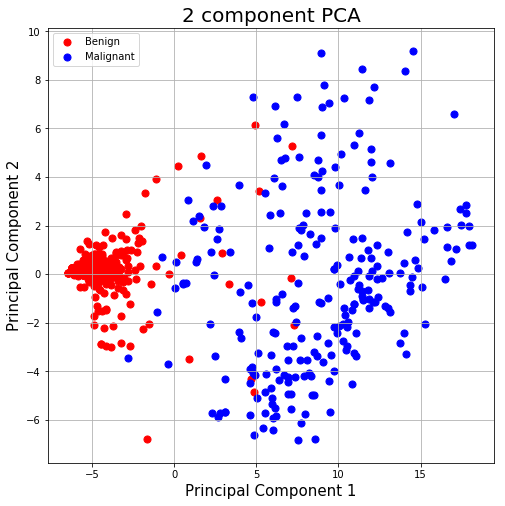

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Benign', 'Malignant']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldataset['Class'] == target
    ax.scatter(finaldataset.loc[indicesToKeep, 'PC1']
               , finaldataset.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['Class']].values

x = StandardScaler().fit_transform(x) # normalizing the features

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)

In [20]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['pc1', 'pc2', 'pc3'])

In [21]:
finaldataset2 = pd.concat([principal_breast_Df, dataset[['Class']]], axis = 1)

finaldataset2['Class'].replace(2, 'Benign' ,inplace=True)
finaldataset2['Class'].replace(4, 'Malignant',inplace=True)

In [22]:
finaldataset2

,pc1,pc2,pc3,Class
0,-1.456220,-0.110210,-0.574438,Benign
1,1.466279,-0.544894,0.283038,Benign
2,-1.579311,-0.074854,0.037413,Benign
3,1.505247,-0.558853,-0.612984,Benign
4,-1.330551,-0.089657,0.027402,Benign
5,5.054140,-1.542614,0.476466,Malignant
6,-1.057400,-0.518582,0.642164,Benign
7,-1.651934,0.016774,0.333214,Benign
8,-1.526659,2.354349,-0.037983,Benign
9,-1.580810,0.019803,-0.342779,Benign


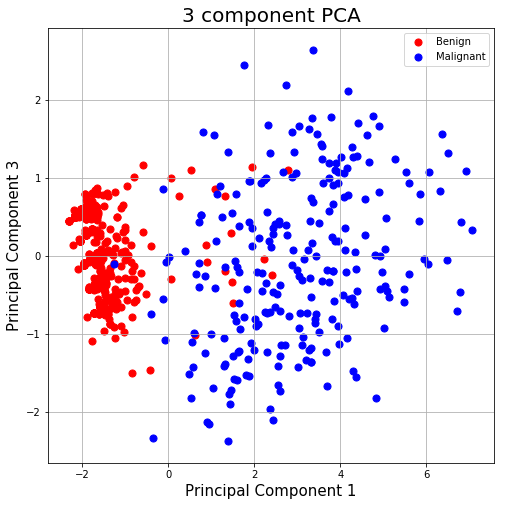

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Benign', 'Malignant']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldataset2['Class'] == target
    ax.scatter(finaldataset2.loc[indicesToKeep, 'pc1']
               , finaldataset2.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Text(0.5, 0.92, 'PCA 3 Component')

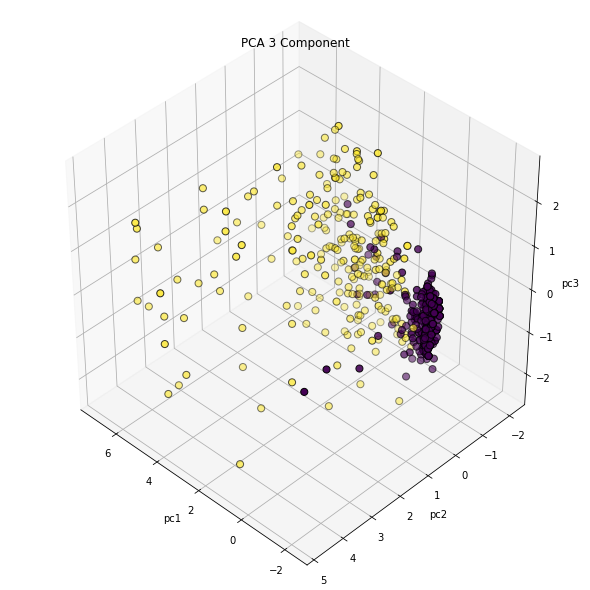

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#Plotting
fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=40, azim=134)
ax.scatter(finaldataset2['pc1'], finaldataset2['pc2'], finaldataset2['pc3'],
          c=dataset.Class.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")
plt.title("PCA 3 Component", fontsize=12)

In [71]:
feature_cols = ['pc1', 'pc2', 'pc3']
X = finaldataset2[feature_cols] # Features
y = finaldataset2.Class # Target variable

In [72]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [73]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

In [74]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [75]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Akurasi:",metrics.accuracy_score(y_test, y_pred))

Akurasi: 0.9714285714285714


In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90  2]
 [ 2 46]]
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        92
   Malignant       0.96      0.96      0.96        48

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



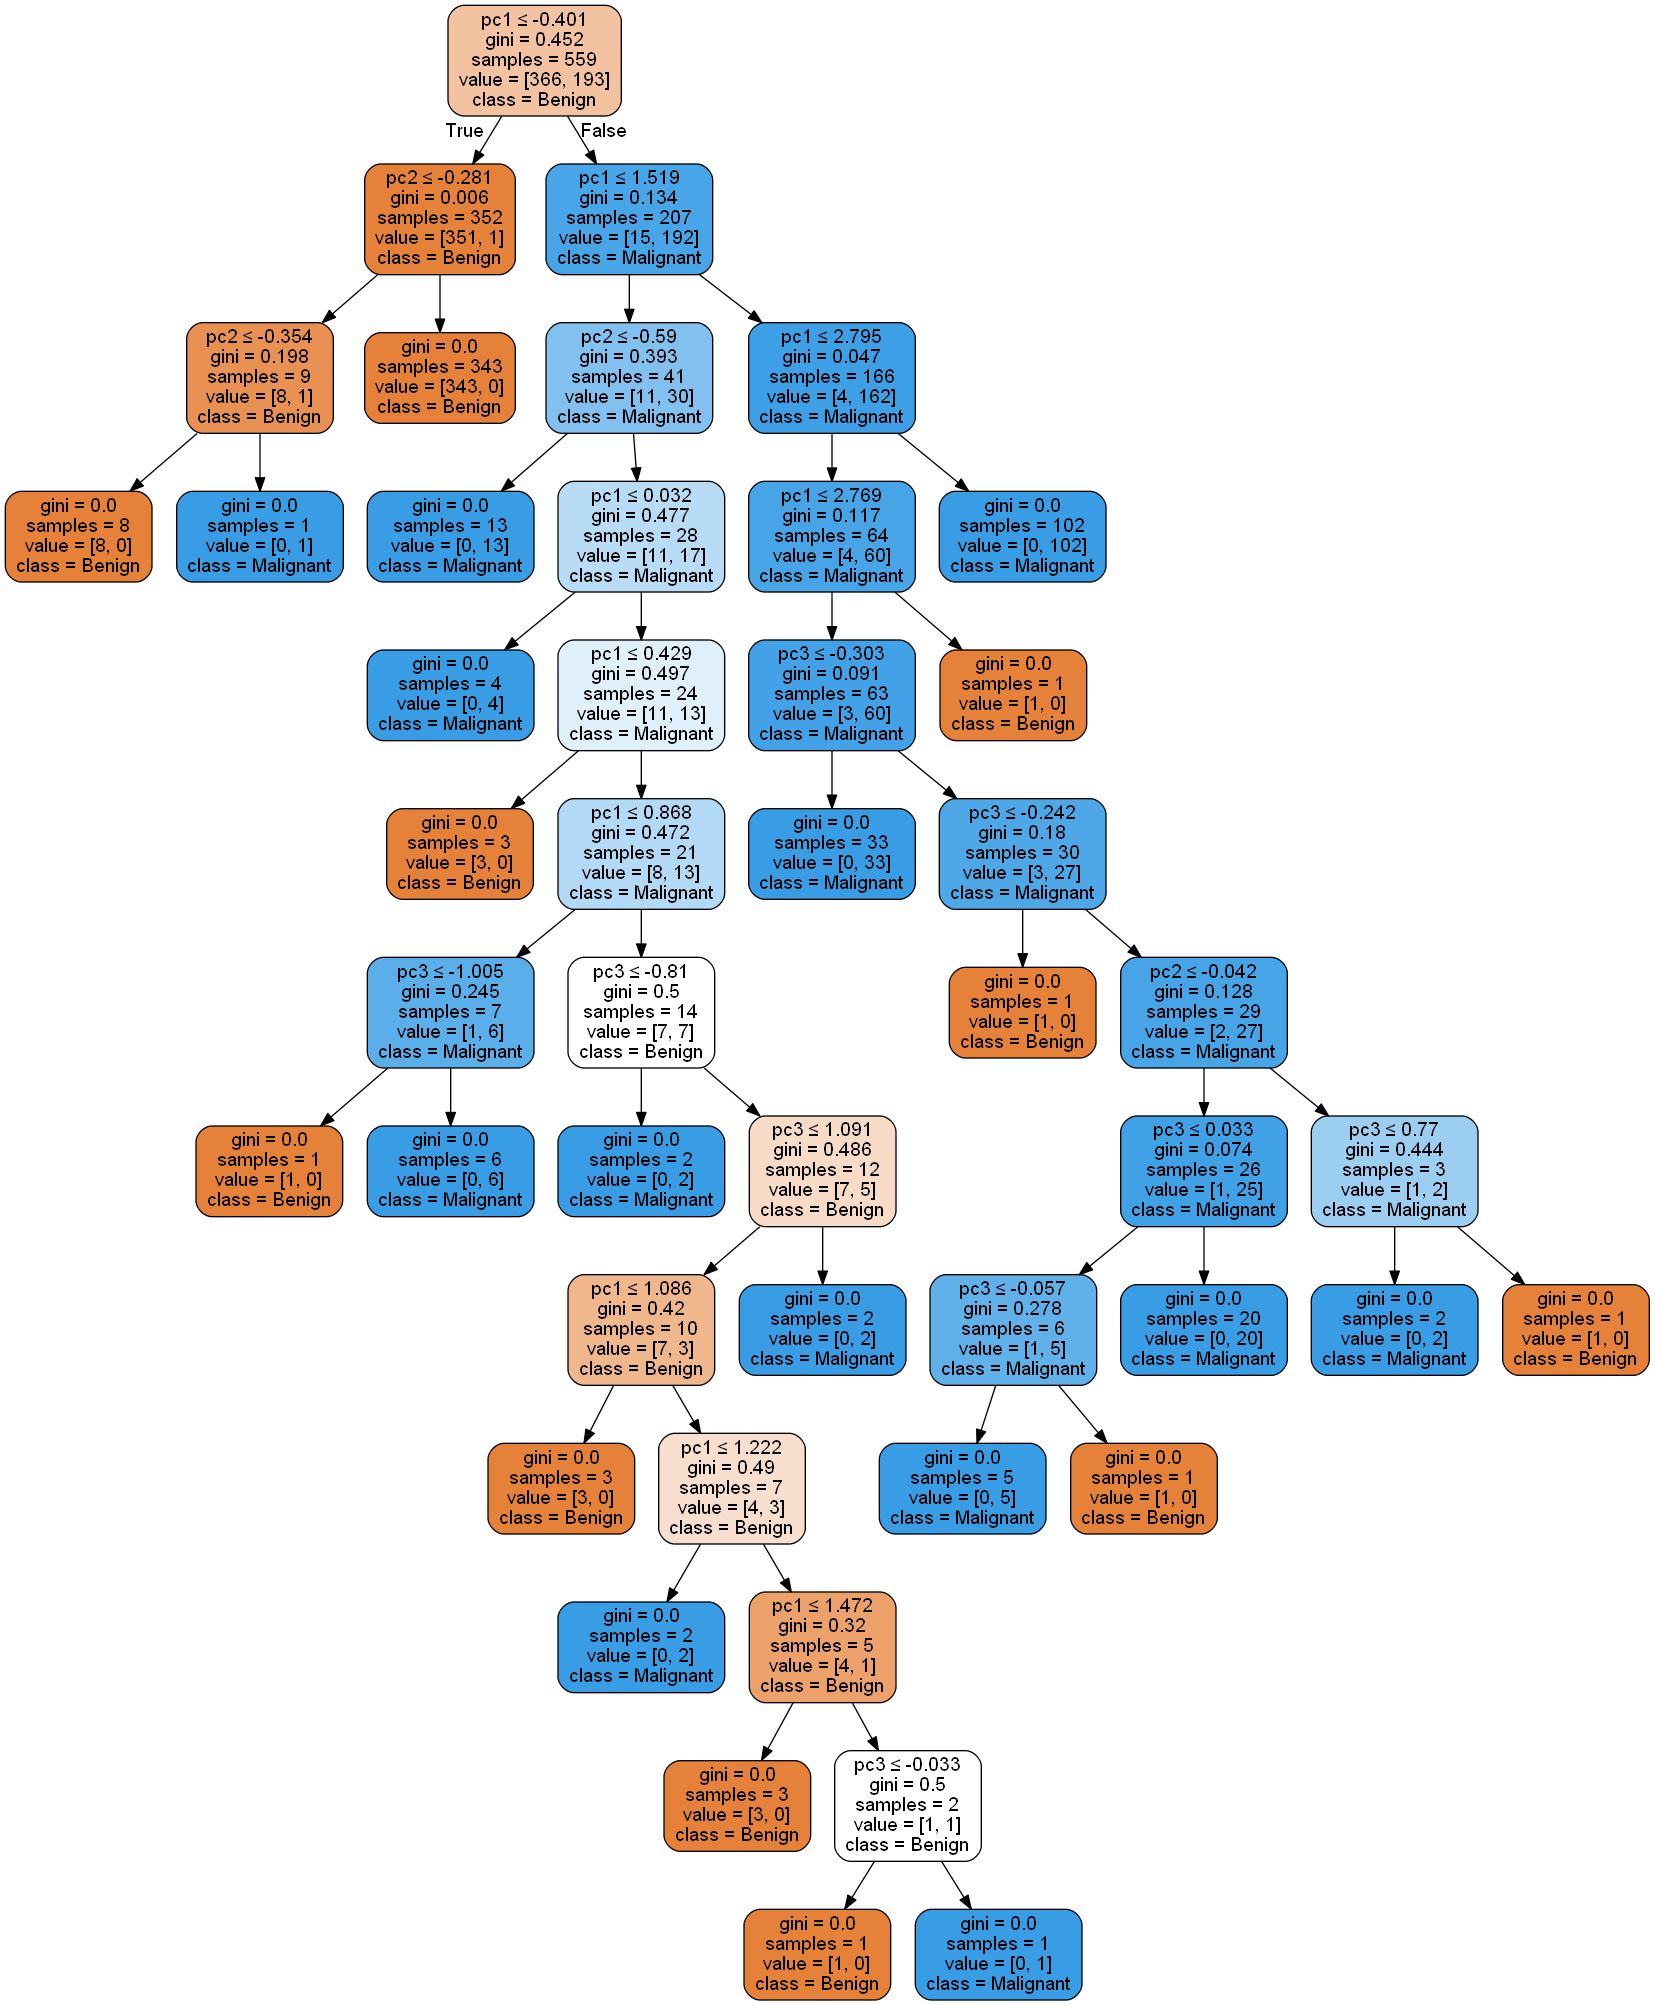

In [78]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Benign', 'Malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini3.png')
Image(graph.create_png())

In [79]:
clf = DecisionTreeClassifier(criterion="entropy")

In [80]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [81]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Akurasi:",metrics.accuracy_score(y_test, y_pred))

Akurasi: 0.9857142857142858


In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90  2]
 [ 0 48]]
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        92
   Malignant       0.96      1.00      0.98        48

   micro avg       0.99      0.99      0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140



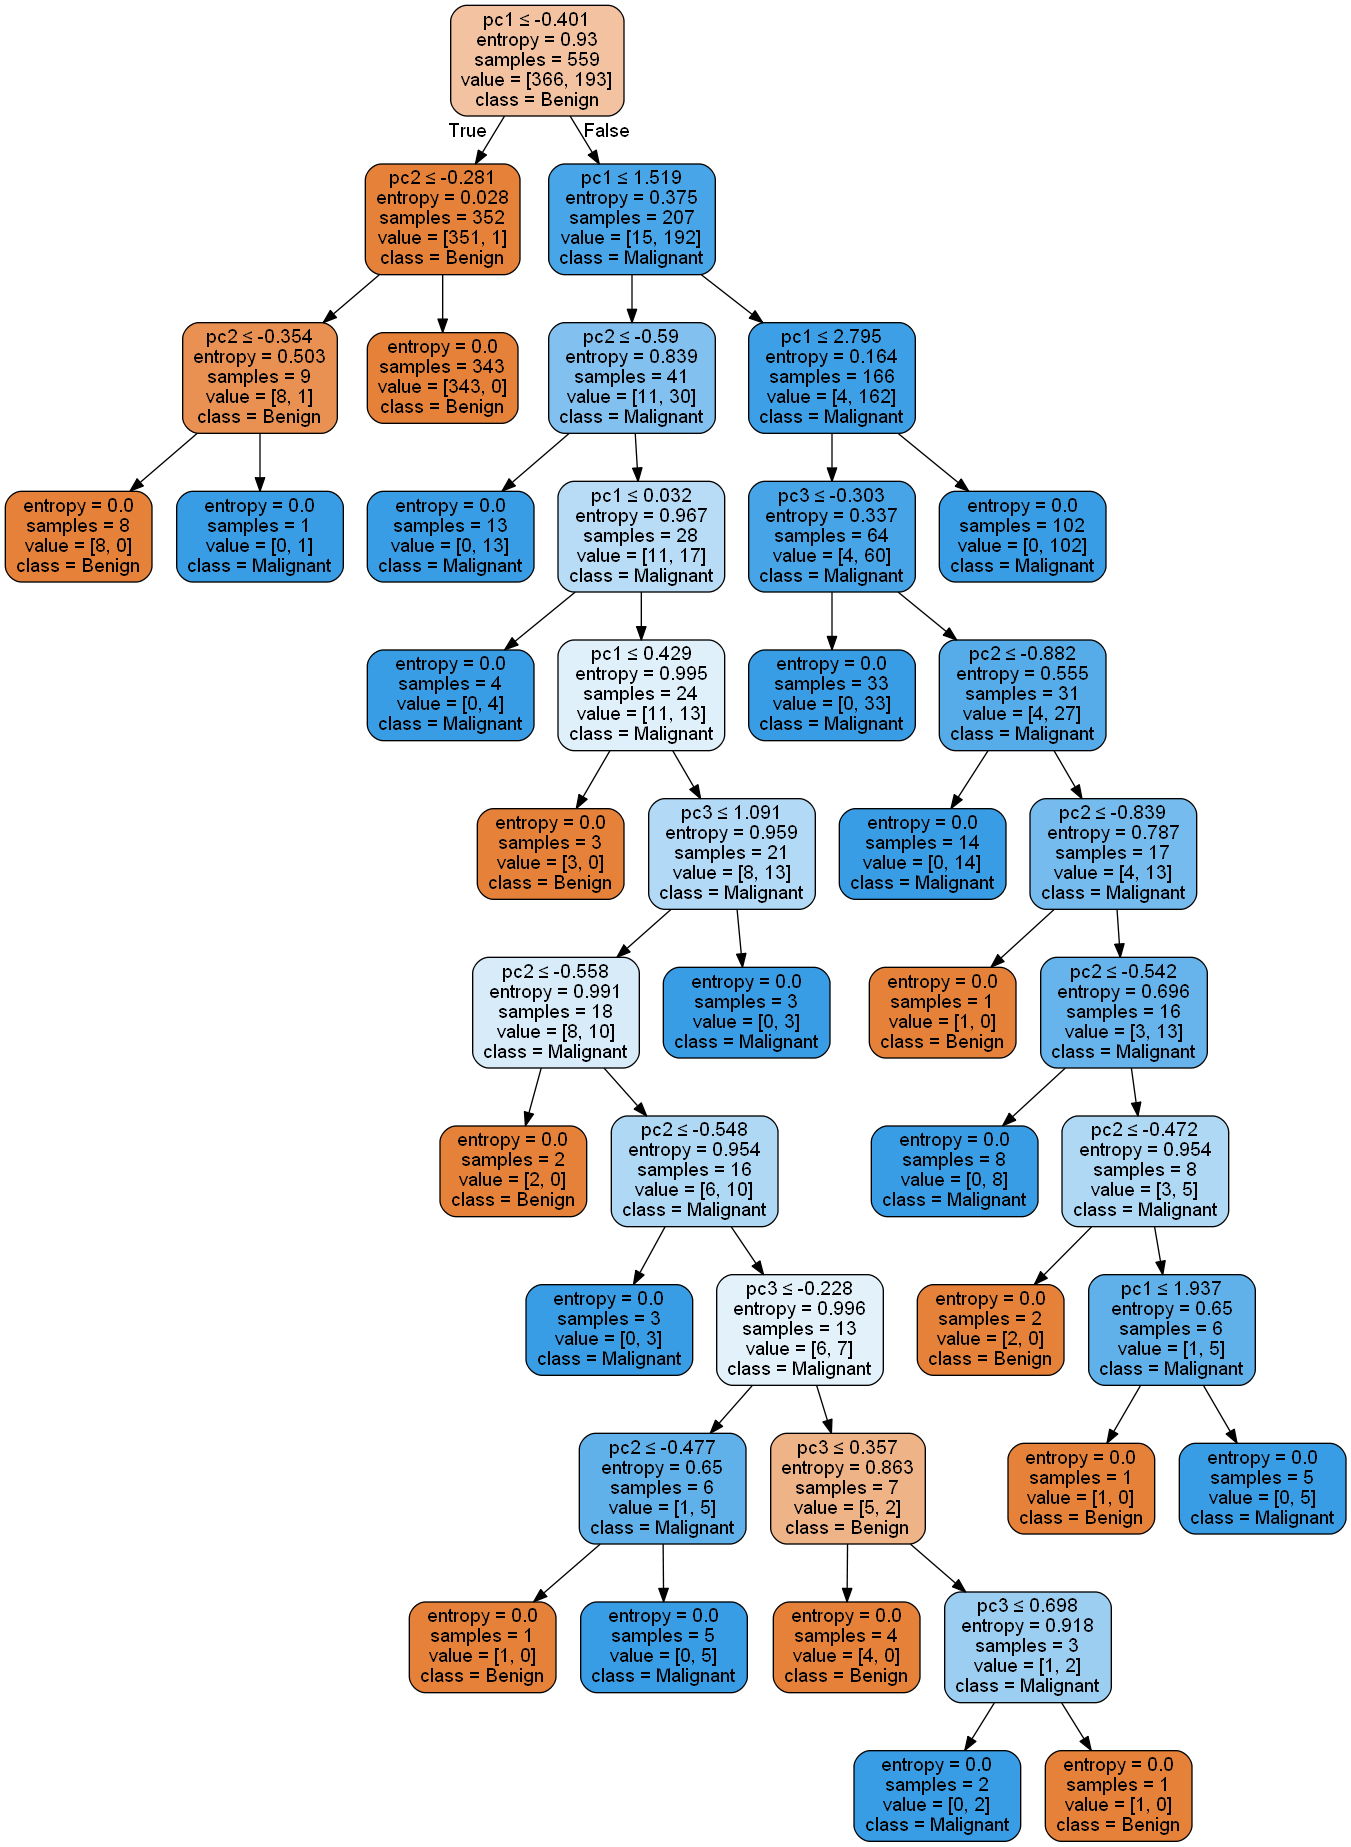

In [84]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Benign', 'Malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('id3.png')
Image(graph.create_png())

In [85]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

dataset = finaldataset2

In [86]:
feature_cols = ['pc1', 'pc2', 'pc3']
X = dataset[feature_cols] # Features
y = dataset.Class # Target variable

In [87]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 70% training and 30% test

In [88]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [92]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9571428571428572


In [93]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97        96
   Malignant       0.91      0.95      0.93        44

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

[[92  4]
 [ 2 42]]


In [91]:
y_pred 

array(['Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant